In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import matplotlib.pyplot as plt
import pydot

# Problem Statement

##### Ypedia is a hotel booking company

1. Report on underperforming and overperforming segments
2. How to tailor the new marketing capaigns for different cities
3. How to improve user booking rate

## Exploring Data

In [15]:
# importing data
sample = pd.read_csv('datasets/sample.csv')

In [18]:
# set display right
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 200)
# pd.set_optio?n('float_format', '%.3f')

In [29]:
#####################explore the data - descriptive statistics#####################

In [31]:
sample.head(3)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22


In [32]:
sample['user_location_city'].nunique()

10779

In [33]:
sample.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,5.858590,2.020710,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,3.722823,0.909774,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,10.000000,9.000000,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [35]:
sample['date_time'].min()

'2013-01-07 00:33:47'

In [36]:
sample['date_time'].max()

'2014-12-31 23:47:14'

In [37]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
Unnamed: 0                   100000 non-null int64
date_time                    100000 non-null object
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    63915 non-null float64
user_id                      100000 non-null int64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_ci                      99878 non-null object
srch_co                      99878 non-null object
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id  

In [38]:
sample.dtypes

Unnamed: 0                     int64
date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

In [39]:
# unique counts
def unique_counts(sample):
   for i in sample.columns:
       count = sample[i].nunique()
       print(i, ": ", count)

In [40]:
unique_counts(sample)

Unnamed: 0 :  100000
date_time :  99886
site_name :  41
posa_continent :  5
user_location_country :  201
user_location_region :  779
user_location_city :  10779
orig_destination_distance :  62206
user_id :  88863
is_mobile :  2
is_package :  2
channel :  11
srch_ci :  1066
srch_co :  1068
srch_adults_cnt :  10
srch_children_cnt :  10
srch_rm_cnt :  9
srch_destination_id :  8827
srch_destination_type_id :  8
is_booking :  2
cnt :  32
hotel_continent :  7
hotel_country :  178
hotel_market :  1843
hotel_cluster :  100


In [41]:
# correlations
pd.crosstab(sample['is_booking'], sample['srch_rm_cnt'])
sample.groupby('srch_rm_cnt')['is_booking'].mean()
sample['srch_children_cnt'].corr(sample['is_booking'])
sample.corr()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,0.005119,-0.000626,0.001028,0.000501,-0.002442,-0.003072,0.010300,-0.006413,-0.000838,-0.000163,-0.003140,0.000239,-0.004142,0.001031,-0.003505,-0.002716,-0.004491,0.006402,0.003373,0.004371,-0.005887
site_name,0.005119,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,-0.005418,0.048820,-0.027780,-0.013405,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,-0.000626,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,0.016331,-0.093459,0.089680,0.012350,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,0.001028,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,0.003728,-0.025284,0.109999,0.042526,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,0.000501,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,0.016982,0.040482,-0.001600,0.005487,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.002442,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,-0.003741,0.013032,0.023497,0.006628,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,-0.003072,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,-0.059464,0.041991,-0.000398,-0.024039,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,0.010300,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,-0.011439,-0.018901,-0.003593,-0.007370,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202
is_mobile,-0.006413,-0.005418,0.016331,0.003728,0.016982,-0.003741,-0.059464,-0.011439,1.000000,0.046903,-0.030770,0.016661,0.018211,-0.022565,-0.007140,-0.016039,-0.028623,0.008084,-0.024144,-0.029574,0.007644,0.012145
is_package,-0.000838,0.048820,-0.093459,-0.025284,0.040482,0.013032,0.041991,-0.018901,0.046903,1.000000,-0.011269,-0.024097,-0.037673,-0.036653,-0.146647,-0.224422,-0.081307,0.126500,0.108993,-0.044426,-0.014636,0.031399


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13C6D590>,
      dtype=object)

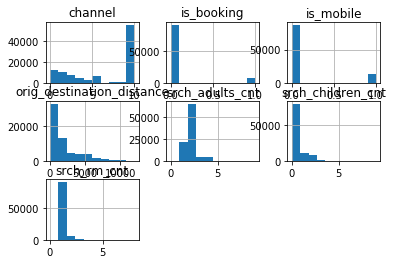

In [42]:
# sample.hist()
sample[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist()


In [ ]:



# distribution of number of booking attempts
sample.groupby('user_id')['is_booking']\
   .agg({'num_of_bookings':'count'}).reset_index()\
   .groupby('num_of_bookings')['user_id']\
   .agg('count')

sample = sample.merge(sample.groupby('user_id')['is_booking']
    .agg(['count']).reset_index())

# distribution of booking rate
sample.groupby('user_id')['is_booking']\
   .agg(['mean']).reset_index()\
   .groupby('mean')['user_id']\
   .agg('count')

(sample.groupby('user_id')['is_booking']\
   .agg(['mean']).reset_index()\
   .groupby('mean')['user_id']\
   .agg('count').reset_index()).plot(x='mean', y='user_id')

#####################explore the data - validate data##################################

#number of guests need to be > 0
pd.crosstab(sample['srch_adults_cnt'], sample['srch_children_cnt'])
sample.drop(sample[sample['srch_adults_cnt'] + sample['srch_children_cnt']==0].index)

sample['srch_co'] = pd.to_datetime(sample['srch_co'])
sample['srch_ci'] = pd.to_datetime(sample['srch_ci'])
sample['date_time'] = pd.to_datetime(sample['date_time'])
sample['date'] = pd.to_datetime(sample['date_time'].apply(lambda x: x.date()))

# Check-out date need to be later than check-in date;
# Check-in date need to be later than booking date

sample[sample['srch_co'] < sample['srch_ci']][['srch_co', 'srch_ci']]
sample[sample['srch_ci'] < sample['date']][['srch_ci', 'date']]

#####################explore the data - create new variables that might be useufl###########
def duration(row):
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

sample['duration'] = sample.apply(duration, axis=1)
sample['days_in_advance'] = sample.apply(days_in_advance, axis=1)

############## Outperforming/underperforming segments #############
cat_list = ['site_name', 'posa_continent',
       'user_location_country', 'user_location_region',
       'user_location_city', 'channel',
       'srch_destination_id', 'srch_destination_type_id',
        'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster']

# for all columns
for i in cat_list:
    print(sample.groupby(i)['is_booking']
          .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})
          .reset_index()
          .sort_values(by='booking_rate'))

# booking rate per channel
sample.groupby('channel')['is_booking']\
    .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})\
    .reset_index()\
    .sort_values(by='booking_rate')

sample['is_booking'].mean()

############## Outperforming/underperforming segments - two sample t test #############
def stats_comparison(i):
    sample.groupby(i)['is_booking'].agg({
    'average': 'mean',
    'bookings': 'count'
    }).reset_index()
    cat = sample.groupby(i)['is_booking']\
        .agg({
            'sub_average': 'mean',
            'sub_bookings': 'count'
       }).reset_index()
    cat['overall_average'] = sample['is_booking'].mean()
    cat['overall_bookings'] = sample['is_booking'].count()
    cat['rest_bookings'] = cat['overall_bookings'] - cat['sub_bookings']
    cat['rest_average'] = (cat['overall_bookings']*cat['overall_average'] \
                     - cat['sub_bookings']*cat['sub_average'])/cat['rest_bookings']
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/\
        np.sqrt(cat['overall_average']*(1-cat['overall_average'])
            *(1/cat['sub_bookings']+1/cat['rest_bookings']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    print(cat)

stats_comparison('user_location_city')

############## clustering - what are the similar user cities? ##############

# Step 1: what are the features I am going to use (that make sense)?
# What features may distinguish cities? based on business sense and exploratory analysis

num_list = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
city_data = sample.dropna(axis=0)[num_list + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)

# Step 2: shall I standardise the data?
# What is the magnitude of data range?

city_groups_std = city_groups.copy()
for i in num_list:
    city_groups_std[i] = preprocessing.scale(city_groups_std[i])

# Step 3: select clustering method and number of clusters
# The Elbow methods? choose a K so that the sum of the square error of the distances decrease drastically
# using an ad-hoc k=3 here, there are methods to help derive the optimal number for k

km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[num_list])

# Principal Component Analysis
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(city_groups[num_list])
city_groups_std['x'] = pca.fit_transform(city_groups_std[num_list])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[num_list])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()

# Step 4: profile the clusters
# merging the two dataframes based on a common column user_location_city
city_groups.merge(city_groups_std[['user_location_city', 'cluster']])\
    .groupby('cluster')\
    .mean() # for every column

# Step 5: assess the statistical robustness
# A statistically robust segmentation return similar results using different clustering methodologies

############### decision tree - what lead to a higher chance of booking for individuals? ###############
from sklearn.cross_validation import train_test_split

# choose a cluster and split them into test and train
sample = sample.merge(city_groups_std[['user_location_city', 'cluster']], left_on='user_location_city', right_on='user_location_city', how='outer')
sample.groupby('cluster')['is_booking'].count()

# choose one of the city clusters to analyze
tree_data = sample.dropna(axis = 0)[sample['cluster']==2]
tree_train, tree_test = train_test_split(tree_data, test_size=0.2, random_state=1, stratify=tree_data['is_booking'])

# build the decision tree model
clf = tree.DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=200)
clf = clf.fit(tree_train[num_list], tree_train['is_booking'])

# test_preds = clf.predict(X = tree_test[num_list])
# clf.predict_proba(tree_test[num_list])

# scoring of the prediction model
clf.score(tree_test[num_list], tree_test['is_booking'])

# visualize the decision tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names =['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt'], filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("booking_tree.pdf")

############### Logistic regression - what lead to a higher chance of booking for individuals? ###############
#create dummy variable channel
sample['channel'].value_counts()
sample['new_channel'] = [i if i in [9, 0, 1, 2] else 'other' for i in sample['channel']]
dummy_channels = pd.get_dummies(sample['new_channel'], prefix='channel')
sample = sample.join(dummy_channels.ix[:, :])
sample['log_orig_destination_distance'] = [np.log(i) for i in sample['orig_destination_distance']]

var_list = ['duration', 'days_in_advance', 'log_orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'channel_1',
            'channel_2', 'channel_9', 'channel_other']

# create logistic estimator
logit = sm.Logit(sample['is_booking'], sample[var_list], missing='drop')
result = logit.fit()
result.summary()

# convert logit to odds ratio
np.exp(result.params)
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

# predicted values
sample['pred'] = result.predict(sample[var_list])

# plot variable VS. marketing_channel
sample.groupby('channel')['is_booking'].mean()

def plot_vs_marketing_channel(variable):
    grouped = pd.pivot_table(sample[(sample['pred'].isnull() == False)], values = ['pred'], index=[variable, 'new_channel'], aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in sample.new_channel.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['pred'])
    pl.xlabel(variable)
    pl.ylabel('prob booking = 1')
    pl.legend(['channel_'+str(i) for i in list(sample.new_channel.unique())], loc='upper right', title='new channel')
    # pl.show()
plot_vs_marketing_channel('days_in_advance')